<a href="https://colab.research.google.com/github/ilhamrozie/pyreservoir_exercise/blob/main/assignment2_Mohamad_Ilham_SPE_PortHarcourt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment of Session 3 and 4

Welcome to the assignment! 

Few things you should note:

* First follow instructions and read the problem statement in the assignment PowerPoint
* You will be coding in this notebook
* To help you coding, follow along our Session 3 and 4 tutorial notebooks.
* Once you have finished, download this notebook (make sure you have renamed the notebook) and submit to Google Classroom. 

Your deadline is Tuesday, 24 November 2020 at 0.00 UTC

## Assignment 1: Formation Evaluation

Run this cell to get all the data and functions, all at once

In [ ]:
!git clone https://github.com/yohanesnuwara/formation-evaluation

import sys
sys.path.append('/content/formation-evaluation')

# these are the functions that we will use
from well_log_display import well_log_display
from triple_combo import triple_combo
from ND_plot import ND_plot
from label_generator import label_generator

# these are the filepaths of the data
well_log_filepath = '/content/formation-evaluation/data/volve/15_9-F-11A.LAS'
well_top_filepath = '/content/formation-evaluation/data/volve/Fmtops_15_9-F-11A.csv'

Cloning into 'formation-evaluation'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 105 (delta 45), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (105/105), 8.03 MiB | 2.55 MiB/s, done.
Resolving deltas: 100% (45/45), done.


Start your codes from here

### Visualize ROP, DRHO, RD, RMED, DTS, and PEF logs

In [ ]:
# Visualize logs as instructed

#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install lasio
import lasio

In [ ]:
#specifiy file path
filepath = '/content/formation-evaluation/data/volve/15_9-F-11A.LAS'

#read with lasio 
well = lasio.read(filepath)

In [ ]:
#check the available logs with .keys()
well.keys()

['DEPTH',
 'ABDCQF01',
 'ABDCQF02',
 'ABDCQF03',
 'ABDCQF04',
 'BS',
 'CALI',
 'DRHO',
 'DT',
 'DTS',
 'GR',
 'NPHI',
 'PEF',
 'RACEHM',
 'RACELM',
 'RD',
 'RHOB',
 'RM',
 'ROP',
 'RPCEHM',
 'RPCELM',
 'RT']

In [ ]:
#see well data in details
well.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="00 001 00 00", descr="0  Depth", original_mnemonic="DEPTH", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF01", unit="g/cm3", value="00 000 00 00:   1  ABDCQF01:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF01", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF02", unit="g/cm3", value="00 000 00 00:   2  ABDCQF02:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF02", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF03", unit="g/cm3", value="00 000 00 00:   3  ABDCQF03:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF03", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF04", unit="g/cm3", value="00 000 00 00:   4  ABDCQF04:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF04", data.shape=(35735,)),
 CurveItem(mnemonic="BS", unit="inches", value="00 000 00 00:   5  BS:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="BS", data.shape=(35735,)),
 CurveItem(mnemonic="CALI", unit="inches", value="70 280 00 01: 

In [ ]:
#see the data in array
well.data

array([[ 188.5,    nan,    nan, ...,    nan,    nan,    nan],
       [ 188.6,    nan,    nan, ...,    nan,    nan,    nan],
       [ 188.7,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [3761.7,    nan,    nan, ...,    nan,    nan,    nan],
       [3761.8,    nan,    nan, ...,    nan,    nan,    nan],
       [3761.9,    nan,    nan, ...,    nan,    nan,    nan]])

In [ ]:
#reset index so that depth is relocated in column not index
well = well.df().reset_index() 

In [ ]:
#check whether the index has been fixed
well

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,3761.5,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.738,NaN,NaN,NaN
35731,3761.6,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.751,NaN,NaN,NaN
35732,3761.7,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.764,NaN,NaN,NaN
35733,3761.8,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.757,NaN,NaN,NaN


In [ ]:
#read in formation top data

filepath = '/content/formation-evaluation/data/volve/Fmtops_15_9-F-11A.csv'

tops = pd.read_csv(filepath)

tops

,PICKS,DEPTH
0,HORDALAND GP. Top,2600.0
1,Ty Fm. Top,2624.0
2,Ekofisk Fm. Top,2794.5
3,Hod Fm. Top,3118.0
4,Draupne Fm. Top,3525.8
5,Heather Fm. Top,3574.9
6,Heather Fm. Sand VOLVE Top,3585.2
7,Hugin Fm. VOLVE Top,3594.6
8,Sleipner Fm. Top,3702.0


In [ ]:
#see help for label generator function
help(label_generator)

Help on function label_generator in module label_generator:

label_generator(df_well, df_tops, column_depth, label_name)
    Generate Formation (or other) Labels to Well Dataframe
    (useful for machine learning and EDA purpose)
    
    Input:
    
    df_well is your well dataframe (that originally doesn't have the intended label)
    df_tops is your label dataframe (this dataframe should ONLY have 2 columns)
      1st column is the label name (e.g. formation top names)
      2nd column is the depth of each label name
    
    column_depth is the name of depth column on your df_well dataframe
    label_name is the name of label that you want to produce (e.g. FM. LABEL)
    
    Output:
    
    df_well is your dataframe that now has the labels (e.g. FM. LABEL)



In [ ]:
#use label generator to generate formation labels in df
df_well = well
df_tops = tops
column_depth = 'DEPTH'
label_name = 'FM. LABEL'

well = label_generator(df_well, df_tops, column_depth, label_name)
well['FM. LABEL'] = well['FM. LABEL'].fillna('Unknown')
well

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FM. LABEL
0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,3761.5,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.738,0.741,0.737,0.77,Sleipner Fm. Top
35731,3761.6,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.751,0.741,0.737,0.77,Sleipner Fm. Top
35732,3761.7,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.764,0.741,0.737,0.77,Sleipner Fm. Top
35733,3761.8,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,65.258,0.25,5.428,0.689,0.668,0.751,2.284,0.77,19.757,0.741,0.737,0.77,Sleipner Fm. Top


In [ ]:
#see help on well log display function
help(well_log_display)

Help on function well_log_display in module well_log_display:

well_log_display(df, column_depth, column_list, column_semilog=None, min_depth=None, max_depth=None, column_min=None, column_max=None, colors=None, fm_tops=None, fm_depths=None, tight_layout=1, title_size=10)
    Display log side-by-side style
    Input:
    df is your dataframe
    specify min_depth and max_depth as the upper and lower depth limit
    column_depth is the column name of your depth
    column_list is the LIST of column names that you will display
    
    column_semilog is specific for resistivity column; if your resistivities are 
      in column 3, specify as: column_semilog=2. Default is None, so if you don't 
      specify, the resistivity will be plotted in normal axis instead
      
    column_min is list of minimum values for the x-axes.
    column_max is list of maximum values for the x-axes.
    
    colors is the list of colors specified for each log names. Default is None,
      so if don't specif

In [ ]:
#check available columns
well.columns

Index(['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI',
       'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD',
       'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT', 'FM. LABEL'],
      dtype='object')

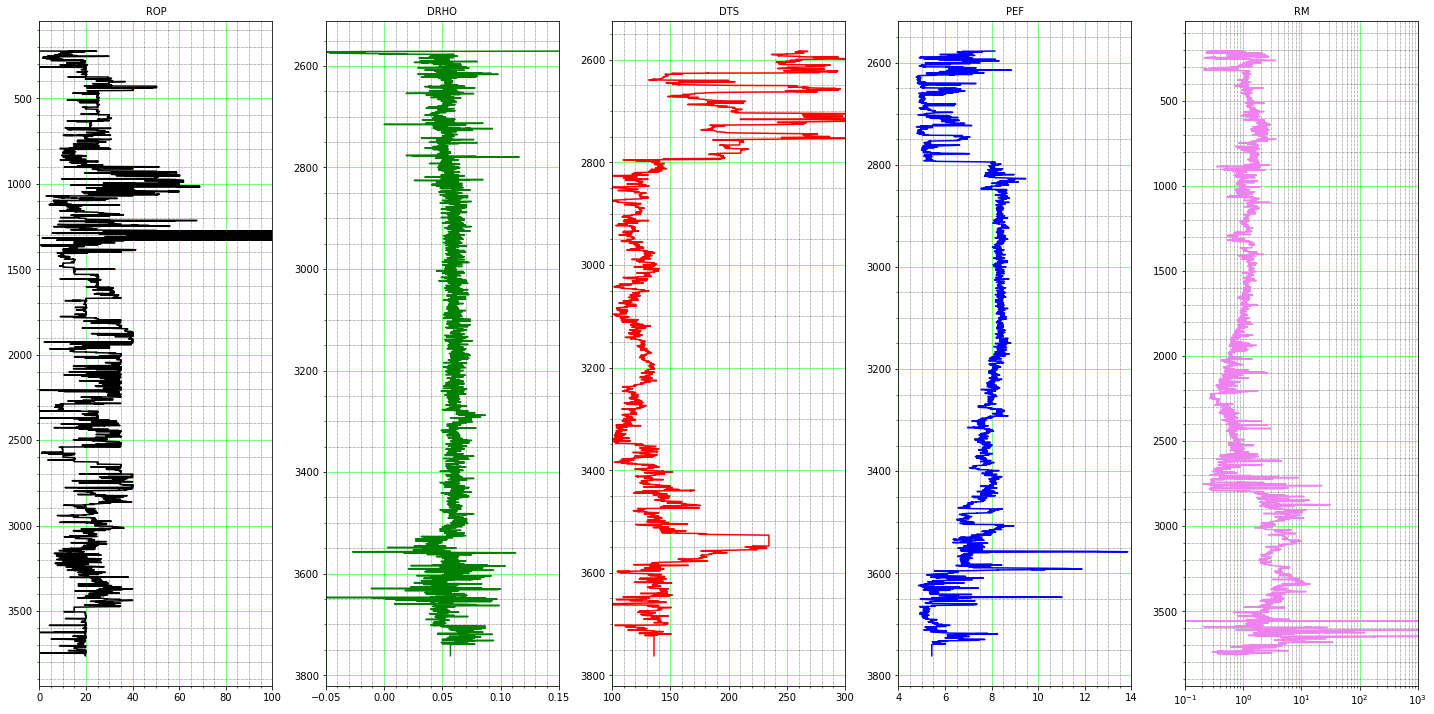

In [ ]:
#visualize well logs
df =well
column_depth = 'DEPTH'
column_list = ['ROP', 'DRHO','DTS', 'PEF', 'RM']
well_log_display(df, column_depth, column_list, column_semilog=4, column_min=[0, -0.05, 100, 4, 0.1], column_max=[100, 0.15, 300, 14, 1000], colors=['black','green','red','blue','violet'])


### Make your triple combo

In [ ]:
# Make your triple combo as instructed

#see help on triple combo function
help(triple_combo)

Help on function triple_combo in module triple_combo:

triple_combo(df, column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB, min_depth, max_depth, min_GR=0, max_GR=150, sand_GR_line=60, min_resistivity=0.01, max_resistivity=1000, color_GR='black', color_resistivity='green', color_RHOB='red', color_NPHI='blue', figsize=(6, 10), tight_layout=1, title_size=15, title_height=1.05)
    Producing Triple Combo log
    
    Input:
    
    df is your dataframe
    column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB
    are column names that appear in your dataframe (originally from the LAS file)
    
    specify your depth limits; min_depth and max_depth
    
    input variables other than above are default. You can specify
    the values yourselves. 
    
    Output:
    
    Fill colors; gold (sand), lime green (non-sand), blue (water-zone), orange (HC-zone)



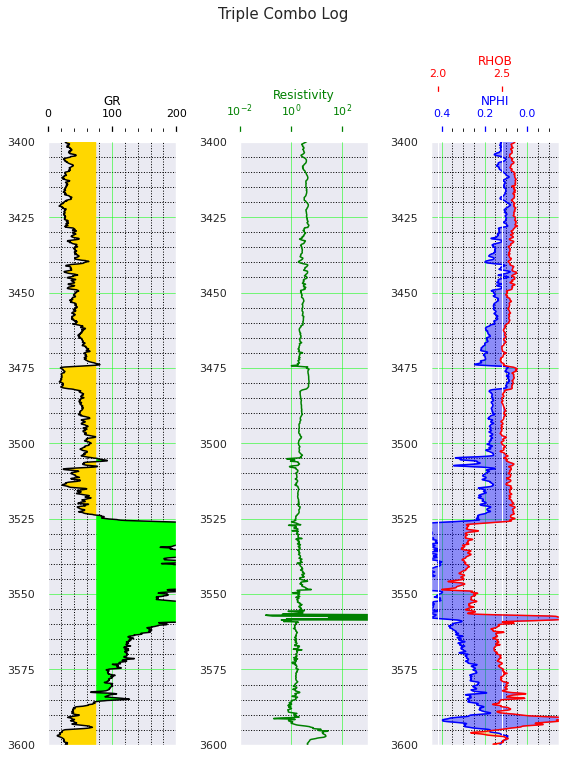

In [ ]:
#vizualize triple combo
df = well
column_depth = 'DEPTH'
column_GR = 'GR'
column_resistivity = 'RT'
column_NPHI = 'NPHI'
column_RHOB = 'RHOB'
min_depth = 3400
max_depth = 3600


triple_combo(df, column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB, min_depth, max_depth, min_GR=0, max_GR=200, sand_GR_line=75, min_resistivity=0.01, max_resistivity=1000, color_GR='black', color_resistivity='green', color_RHOB='red', color_NPHI='blue', figsize=(6, 10), tight_layout=1, title_size=15, title_height=1.05)

### Make your Neutron-Density Plot

In [ ]:
#see help on neutron density plot
help(ND_plot)

Help on function ND_plot in module ND_plot:

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by, figsize=(7, 7), scatter_size=50, scatter_alpha=0.5)
    Producing Neutron-Density (Cross)plot
    
    Input:
    
    denfl is your fluid density
    df is your dataframe
    column_nphi and column_rhob are the column name of your NPHI and RHOB
    column_hue is the column name that you want for the color of the points
      e.g. depth, vshale, formation labels, etc. 
    
    color_by depends on the column_hue that you're giving
      * if you're giving a continuous hue (numerical) like depth or vshale
        define color_by='continuous'
      * if you're giving a categorical hue (labels) like formation names
        define color_by='categorical'
    
    figsize, scatter_size, scatter_alpha are by default. You can also specify
      by yourselves.
    
    Output:
    
    3 lines. Blue is sandstone, black is limestone, red is dolomite
    Each line has dots representing 

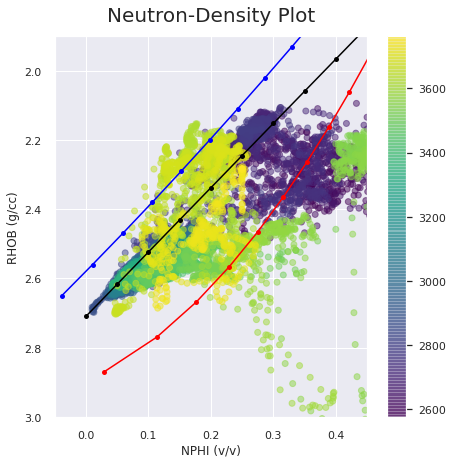

In [ ]:
# Make your Neutron-Density plot as instructed


denfl = 0.85
df = well
column_nphi = 'NPHI'
column_rhob = 'RHOB'
column_hue = 'DEPTH'
color_by = 'continuous'

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by)

### Compute PHIF and VSH on Sleipner Formation

In [ ]:
# Compute PHIF and VSH on Sleipner Formation

#list all formation labels df['x'].unique()
well['FM. LABEL'].unique()

array(['Unknown', 'HORDALAND GP. Top', 'Ty Fm. Top', 'Ekofisk Fm. Top',
       'Hod Fm. Top', 'Draupne Fm. Top', 'Heather Fm. Top',
       'Heather Fm. Sand VOLVE Top', 'Hugin Fm. VOLVE Top',
       'Sleipner Fm. Top'], dtype=object)

In [ ]:
# create masks for Sleipner Fm using string contains: str.contains.('...')
mask_sleipner = well['FM. LABEL'].str.contains('Sleipner')

In [ ]:
# create dataframe subsets of Sleipner: df[mask]
sleipner = well[mask_sleipner]
sleipner.head()

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FM. LABEL
35135,3702.0,2.253,2.270,2.304,2.260,8.5,8.703,0.046,83.706,136.617,48.506,0.233,6.090,1.694,1.662,1.476,2.272,1.295,19.196,1.295,1.476,1.295,Sleipner Fm. Top
35136,3702.1,2.257,2.290,2.350,2.271,8.5,8.703,0.044,80.906,132.663,46.782,0.222,6.144,1.794,1.692,1.544,2.298,1.418,19.193,1.418,1.544,1.418,Sleipner Fm. Top
35137,3702.2,2.262,2.319,2.419,2.287,8.5,8.703,0.043,78.083,127.499,47.631,0.204,6.180,1.816,1.697,1.621,2.334,1.610,19.189,1.610,1.621,1.610,Sleipner Fm. Top
35138,3702.3,2.263,2.358,2.493,2.312,8.5,8.703,0.042,75.068,120.885,51.011,0.184,6.204,1.816,1.694,1.771,2.376,2.003,19.182,2.005,1.771,2.003,Sleipner Fm. Top
35139,3702.4,2.267,2.405,2.550,2.354,8.5,8.750,0.042,71.860,112.672,52.438,0.161,6.210,1.809,1.682,2.107,2.417,3.150,17.338,3.152,2.107,3.150,Sleipner Fm. Top


In [ ]:
#petrophysical props of Sleipner Fm.
rho_ma = 2.65
rho_fl = 0.9
gr_min = 7
gr_max = 105
gr = sleipner['GR']
A = 0.4
B = 0.01
rho_b = sleipner['RHOB']
phin = sleipner['NPHI']

In [ ]:
#calculate density porosity for Sleipner
phid = (rho_ma - rho_b) / (rho_ma - rho_fl)

In [ ]:
#calculate total porosity, PHIF
phif = phid + A * (phin - phid) + B

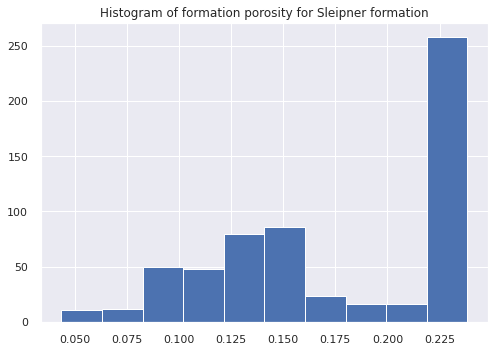

In [ ]:
#display histogram with bins 10
plt.hist(phif, bins=10)
plt.title('Histogram of formation porosity for Sleipner formation')
plt.show()

In [ ]:
#calculate vsh
vsh = (gr - gr_min) / (gr_max - gr_min)

#print summary of stats: df.describe()
vsh.describe()

count    600.000000
mean       0.529694
std        0.167260
min        0.152296
25%        0.395268
50%        0.570230
75%        0.634383
max        0.982357
Name: GR, dtype: float64

## Assignment 2: Material Balance Analysis

Run this cell to get all the data and functions, all at once



In [ ]:
!git clone https://github.com/yohanesnuwara/pyreservoir

import sys
sys.path.append('/content/pyreservoir/matbal')

# these are the functions that we will use
from mbal import drygas, gascondensate, oil
from aquifer import veh

# this is the filepath to the data
prod_filepath = '/content/pyreservoir/data/dry_gas_with_overpressure.csv'

# these are the names that define each column in the data
columns = ['date', 'p', 'z', 'Gp', 'Bg']

Cloning into 'pyreservoir'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 819 (delta 85), reused 0 (delta 0), pack-reused 658
Receiving objects: 100% (819/819), 24.03 MiB | 12.76 MiB/s, done.
Resolving deltas: 100% (439/439), done.


The reservoir has the following properties:

* Formation compressibility is 19.5 microsip
* Water compressibility is 3 microsip
* Initial water saturation is 0.22
* Reservoir extent is 500 m (1 m = 3.281 ft)
* Reservoir thickness is 50 ft
* Porosity is 0.3
* Permeability is 250 md
* Water viscosity is 0.87 cp

And also, some variables in the production data are NOT recorded in FIELD UNITS. They are:
* Cum. gas production [BSCF]


Start your codes from here

### Material balance plots

In [ ]:
#read the csv data
data = pd.read_csv(prod_filepath, header=None, names=columns)
data

,date,p,z,Gp,Bg
0,25 January 1966,11444,1.496,0.00,0.002672
1,1 February 1967,10674,1.438,9.92,0.002753
2,1 February 1968,10131,1.397,28.62,0.002818
3,1 June 1969,9253,1.330,53.60,0.002938
4,1 June 1970,8574,1.280,77.67,0.003051
5,1 June 1971,7906,1.230,101.42,0.003180
6,1 June 1972,7380,1.192,120.36,0.003301
7,1 September 1973,6847,1.154,145.01,0.003445
8,1 August 1974,6388,1.122,160.63,0.003590
9,1 August 1975,5827,1.084,182.34,0.003802


In [ ]:
#see help on matbal for dry gas res
help(drygas)
drygas()

Help on class drygas in module mbal:

class drygas(builtins.object)
 |  Dry-Gas Material Balance Plot
 |  
 |  Methods defined here:
 |  
 |  calculate_params(self, p, Bg, Gp, cf, cw, swi)
 |      Calculate Material Balance Paramaters for Dry-Gas Reservoir
 |      
 |      Output: F, Btg, Efw, Eg
 |  
 |  plot(self, p, z, Gp, F, Btg, Efw, Eg)
 |      Create Material Balance Plots for Dry-Gas Reservoir
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [ ]:
#define variables as arrays
p = data['p'].to_numpy()
Bg = data['Bg'].to_numpy()
Gp = data['Gp'].to_numpy()*(1E+9)
z = data['z'].to_numpy()
cf = 19.5E-6
cw = 3E-6
swi = 0.22 

In [ ]:
#calc parameters for plotting: use function "calculate params"
x = drygas()
F, Btg, Efw, Eg = x.calculate_params(p, Bg, Gp, cf, cw, swi)

/content/pyreservoir/matbal/mbal.py:143: RuntimeWarning: invalid value encountered in true_divide
  x3, y3 = Gp, (F / Eg)


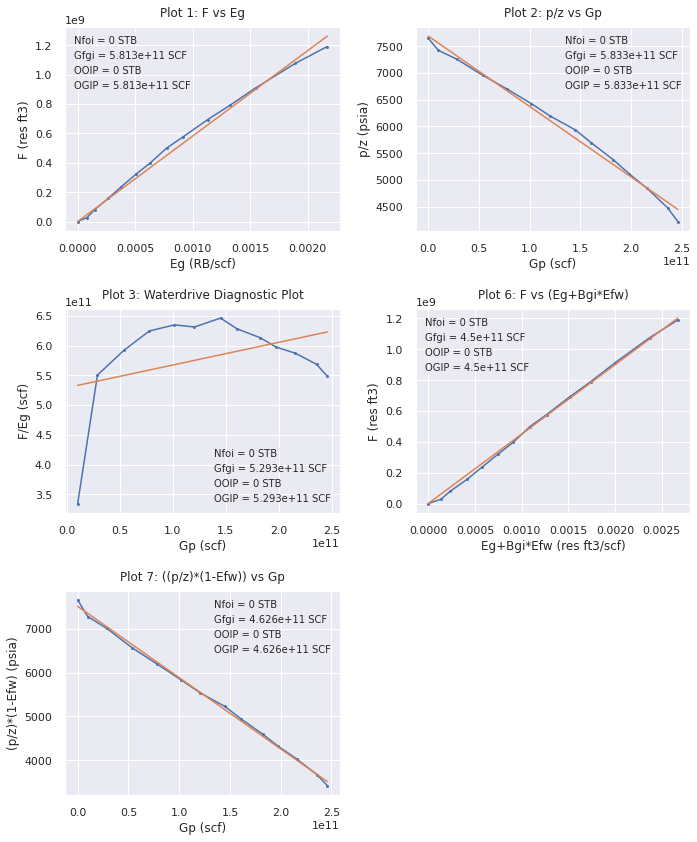

In [ ]:
# Make material balance plots 

plt.figure(figsize=(10,12))

x.plot(p, z, Gp, F, Btg, Efw, Eg)

plt.show()



### Calculate aquifer influx using VEH model



In [ ]:
#see help for Van Everdingen Hurst 
help(veh)

Help on class veh in module aquifer:

class veh(builtins.object)
 |  Methods defined here:
 |  
 |  calculate_aquifer(self, datetime, pressure, cf, cw, perm, poro, mu_w, r_R, B_star)
 |  
 |  calculate_aquifer_constant(self, r_R, h, cf, cw, poro)
 |      Calculate theoretical aquifer constant for VEH (assuming cylindrical reservoir)
 |      
 |      Input:
 |      r_R = reservoir radius
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [ ]:
#convert to datetime format
data['date'] = pd.to_datetime(data['date'])
data

,date,p,z,Gp,Bg
0,1966-01-25,11444,1.496,0.00,0.002672
1,1967-02-01,10674,1.438,9.92,0.002753
2,1968-02-01,10131,1.397,28.62,0.002818
3,1969-06-01,9253,1.330,53.60,0.002938
4,1970-06-01,8574,1.280,77.67,0.003051
5,1971-06-01,7906,1.230,101.42,0.003180
6,1972-06-01,7380,1.192,120.36,0.003301
7,1973-09-01,6847,1.154,145.01,0.003445
8,1974-08-01,6388,1.122,160.63,0.003590
9,1975-08-01,5827,1.084,182.34,0.003802


In [ ]:
#calculate B* (aquifer constant)


y = veh()
cf = 19.5E-6
cw = 3E-6
poro = 0.3
h = 50
r_R = 500*3.281
B_star = y.calculate_aquifer_constant(r_R, h, cf, cw, poro)
print('Aquifer constant in RB/D-psi:', B_star)

Aquifer constant in RB/D-psi: 1016.380520915625


In [ ]:
#define required input
datetime = data['date']
pressure = data['p'].to_numpy()  
cf = 19.5E-6
cw = 3E-6 
perm = 250
poro = 0.3
mu_w = 0.87
r_R = 500*3.281
B_star = B_star

In [ ]:
# Calculate aquifer influx

We = y.calculate_aquifer(datetime, pressure, cf, cw, perm, poro, mu_w, r_R, B_star)
We


[0.0,
 7733155.196780589,
 26200775.895284206,
 62632737.24685632,
 100895938.40778142,
 146947283.60476923,
 199464553.08789238,
 270582760.66471225,
 327441127.34373164,
 395021145.72357535,
 457775605.64596975,
 532207340.77085656,
 625945694.3845456,
 709984246.8177946]

### Plot the aquifer influx

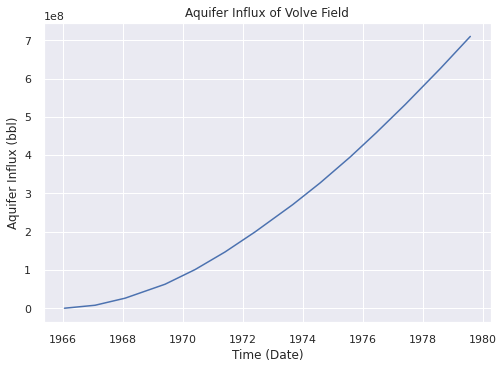

In [ ]:
# Plot the aquifer influx

plt.plot(datetime, We)
plt.title('Aquifer Influx of Volve Field')
plt.xlabel('Time (Date)')
plt.ylabel('Aquifer Influx (bbl)') 
plt.show()